# Čišćenje dataseta

U ovom dijelu izvršit ćemo čišćenje i pripremu podataka kako bi oni bili spremni za treniranje modela. Ovaj postupak se sastoji od sljedećih koraka:

1. **Isključivanje kolona:** Iz inicijalnog dataseta izuzimamo određene kolone koje nisu relevantne za našu analizu. Kolone koje treba isključiti navedene su u listi `exclude_columns`

2. **Uklanjanje stanova koji nemaju navedenu cijenu:** uklanjamo stanove koji nemaju navedene cijene, jer nisu korisni za naš zadatak predviđanja cijena

3. **Pretvaranje cijene stana u vrijednost tipa "float":** Konvertujemo kolonu `cijena` u `float` tip podataka. Cijene su originalno u formatu "X KM" (konvertibilna marka), tako da uklanjamo simbol valute i pretvaramo polje realnu brojnu vrijednost.

4. **Pretvaranje površine stana u vrijednost tipa "float":** Konvertujemo kolonu `povrsina` u `float` tip podataka. To nam omogućava da radimo sa numeričkim vrijednostima za polje površine stana.

5. **Pretvaranje površine balkona u vrijednost tipa "float":** Konvertujemo kolonu `povrsine_balkona` u `float` tip podataka. Ako nedostaje vrijednost (`NaN`), popunjavamo je s `0`.

6. **Mapiranje tipova soba:** Mapiramo vrijednosti u koloni `broj_soba` u numeričku skalu. Definiramo rječnik `room_mapping` koji koristimo za pretvaranje broja soba u njihove odgovarajuće numeričke vrijednosti.

7. **Identificiranje i popravljanje vrijednosti logičkih kolona:** Logičke kolone su specificirane u listi `bool_cols`. Sve vrijednosti koje nedostaju u ovim kolonama popunjavamo sa `False` i mijenjamo tip podataka datih kolona u `Boolean`.

Proces čišćenja podataka osigurava da skup podataka bude u prikladnom formatu za dalju analizu i obuku modela.




# Eksplorativna analiza podataka

Pored čišćenja podataka, u ovom dijelu vršimo i eksplorativnu analizu podataka (Exploratory Data Analysis - EDA) nad očišćenim skupom podataka. Ona se sastoji iz sljedećih koraka:

1. **Plottiranje broja NaN vrijednosti u datasetu**: Crtamo broj `NaN` vrijednosti u svakoj koloni skupa podataka koristeći funkciju `plot_nan_counts`. Ovo nam pomaže da identificiramo sve nedostajuće podatke koje treba riješiti. Iz prvog iscrtanog grafika možemo očitati broj `NaN` vrijednosti po kolonama našeg dataseta.

2. **Ponovno plottiranje broja NaN vrijednosti:** Nakon izršavanja koraka 7. iz prethodnog dijela (Identificiranje i popravljanje vrijednosti logičkih kolona), ponovo iscrtavamo broj `NaN` vrijednosti u svakoj koloni kako bismo provjerili da su vrijednosti koje nedostaju obrađene.

3. **Korelacijska toplotna mapa (heatmap):** Kreiramo toplotnu mapu korelacije koristeći funkciju `sns.heatmap` iz Seaborn biblioteke. Toplotna mapa vizualizira korelaciju između različitih varijabli u skupu podataka. Ovo nam pomaže da identifikujemo sve značajne odnose ili zavisnosti između varijabli.

4. **Kategoričke kolone:** Definiramo listu kategoričkih kolona u skupu podataka. Ove kolone sadrže kategoričke podatke koji će se koristiti za dalju analizu. 
Inače, u statistici, kategoričke varijable su one varijable koje mogu uzimati vrijednosti iz ograničenog, i najčešće predefiniranog, fiksnog skupa vrijednosti. U našem datasetu, to su kolone: `broj_soba`, `sprat`, `namjesten`, `stanje`, `vrsta_grijanja`, `godina_izgradnje`, `vrsta_poda`, `blindirana_vrata`, `internet`, `kablovska_tv`, `klima`, `lift`, `novogradnja`, `tel_prikljucak`, `uknjizeno_zk`, `plin`, `podrum_tavan`, `video_nadzor`, `ostava_spajz`, `alarm` i `nedavno_adaptiran`.


5. **Plotting Box Plots:** Iscrtavamo okvirne/kutijaste dijagrame (`boxplots`) varijable cijene (`cijena`) grupisane po svakoj kategoričkoj koloni pomoću funkcije `plot_boxplots_categorical`. Ovo nam omogućava da vizualiziramo distribuciju cijena u različitim kategorijama i identificiramo sve potencijalne obrasce ili odstupanja.
Boxplot je standardizirani način prikaza distribucije podataka na temelju pet veličina (minimum, prvi kvartil (Q1), medijan, treći kvartil (Q3) i maksimum).

Ovakva analiza podataka pruža uvid u skup podataka, pomaže nam da razumijemo odnose između varijabli i vodi nas u odabiru odgovarajućih karakteristika za naše modele mašinskog učenja.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [28]:
# List of columns to exclude
exclude_columns = ['Unnamed: 0', 'title', 'details', 'vrsta_oglasa', 'kucni_ljubimci', 'datum_objave', 'primarna_orijentacija', 'voda', 'struja', 'kanalizacija', 'balkon.1', 'balkon']

# Read the CSV file and exclude the specified columns
df = pd.read_csv('svi_stanovi.csv',sep=";", usecols=lambda col: col not in exclude_columns)
#df = pd.read_csv('all_condos.csv',sep=";", usecols=lambda col: col not in exclude_columns)


# Cleaning columns
# Apartments without price have no use for us:
df=df[df['cijena']!='Na upit']
# Convert price to float:
df['cijena']=df['cijena'].map(lambda x: float(x.split(' KM')[0].replace('.','')))

# Convert surface area to float:
df['kvadratura']=df['kvadratura'].astype(float)

# Convert surface area of balcony to float:
df['kvadratura_balkona'] = df['kvadratura_balkona'].fillna(0).astype(float)

# Convert the values in the 'Rooms' column using the room_mapping dictionary
room_mapping = {
    'Garsonjera': 0,
    'Jednosoban (1)': 1,
    'Jednoiposoban (1.5)': 1.5,
    'Dvosoban (2)': 2,
    'Trosoban (3)': 3,
    'Četverosoban (4)': 4,
    'Petosoban i više': 5
}
df['broj_soba'] = df['broj_soba'].map(room_mapping)


# Fixing boolean columns:
bool_cols = ['blindirana_vrata', 'internet', 'kablovska_tv', 'klima', 'lift','novogradnja',
             'tel_prikljucak', 'uknjizeno_zk',  'plin', 'podrum_tavan', 'video_nadzor', 'ostava_spajz',
             'alarm', 'nedavno_adaptiran']

In [30]:
def fix_boolean_columns(df, boolean_columns):
    """
    Function for fixing boolean columns with missing False values.
    """
    # Fill NaN values in boolean columns with False
    df[boolean_columns] = df[boolean_columns].fillna(False)
    
    # Change data type of boolean columns to boolean
    df[boolean_columns] = df[boolean_columns].astype(bool)
    
    return df

def plot_nan_counts(df):
    # Count the number of NaN values per column
    nan_counts = df.isna().sum()

    # Sort nan_counts in ascending order
    nan_counts = nan_counts.sort_values()

    # Set the figure size
    plt.figure(figsize=(6, 10))

    # Create a bar plot of NaN counts with rotated axes
    plt.barh(nan_counts.index, nan_counts.values)  # Use barh() for horizontal bar plot
    plt.ylabel('Column')  # Set y-axis label
    plt.xlabel('Number of NaNs')  # Set x-axis label
    plt.title('Number of NaNs per Column')
    plt.xticks(rotation=90)  # Rotate x-tick labels

    plt.show()

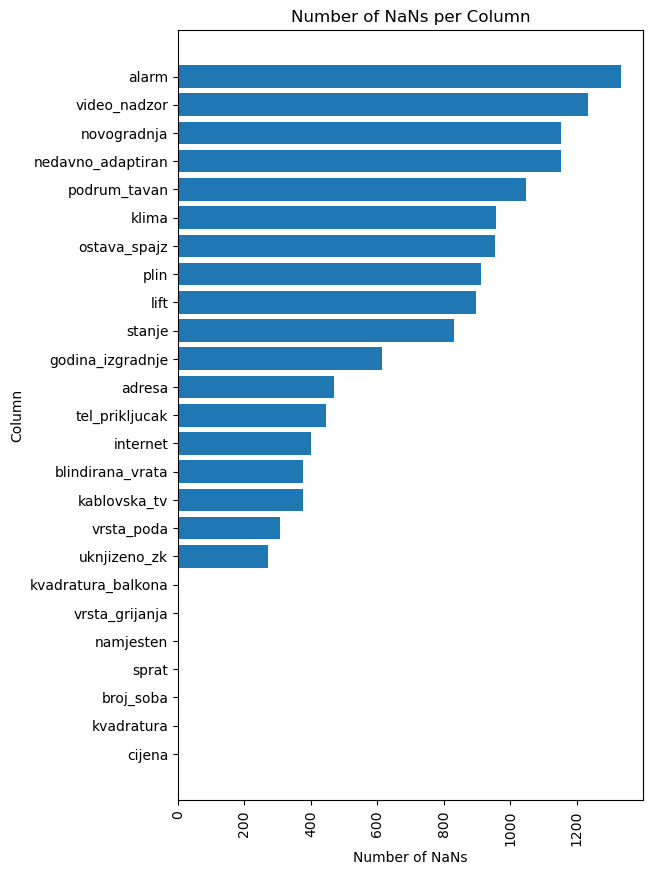

In [31]:
plot_nan_counts(df)

In [32]:
df = fix_boolean_columns(df, bool_cols)

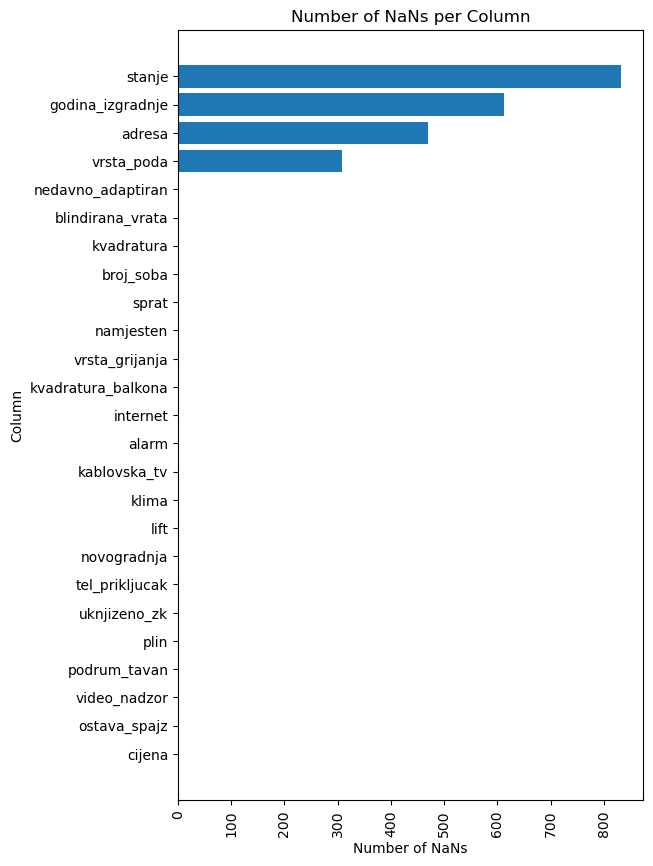

In [33]:
plot_nan_counts(df)

In [ ]:
def plot_boxplot(df, column, by):
    # Set the figure size
    plt.figure(figsize=(10, 6))

    # Create a box plot of 'column' grouped by 'by'
    boxplot = df.boxplot(column=column, by=by)

    # Set x-axis label, y-axis label, and title
    plt.xlabel(by)
    plt.ylabel(column)
    plt.title(f"Boxplot of '{column}' grouped by '{by}'")
    plt.suptitle('')  # Remove the default 'Boxplot grouped by ...' title
    plt.xticks(rotation=90)

    # Disable scientific notation on y-axis
    boxplot.yaxis.get_major_formatter().set_scientific(False)

    plt.show()
    
    
def plot_boxplots_categorical(df, averaged_value, cat_values_list):
    # Determine the optimal number of plots horizontally and vertically
    num_plots = len(cat_values_list)
    num_cols = math.ceil(math.sqrt(num_plots))
    num_rows = math.ceil(num_plots / num_cols)

    # Set the figure size
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(25, 15), sharey=True)
    fig.suptitle('Box Plots of {} by Categorical Columns'.format(averaged_value), fontsize=14)

    # Flatten the axes array
    axes = axes.flatten()

    # Plot box plots for each categorical column
    for i, col in enumerate(cat_values_list):
        ax = axes[i]
        if i < num_plots:
            df.boxplot(column=averaged_value, by=col, ax=ax)
            ax.set_xlabel(col)
            ax.set_ylabel(averaged_value)
        else:
            fig.delaxes(ax)
            fig.xticks(rotation=90)

    # Adjust the layout and spacing
    plt.tight_layout()

    # Remove any empty subplots from the figure
    for ax in axes[num_plots:]:
        fig.delaxes(ax)

    # Show the plot
    plt.show()

<Axes: >

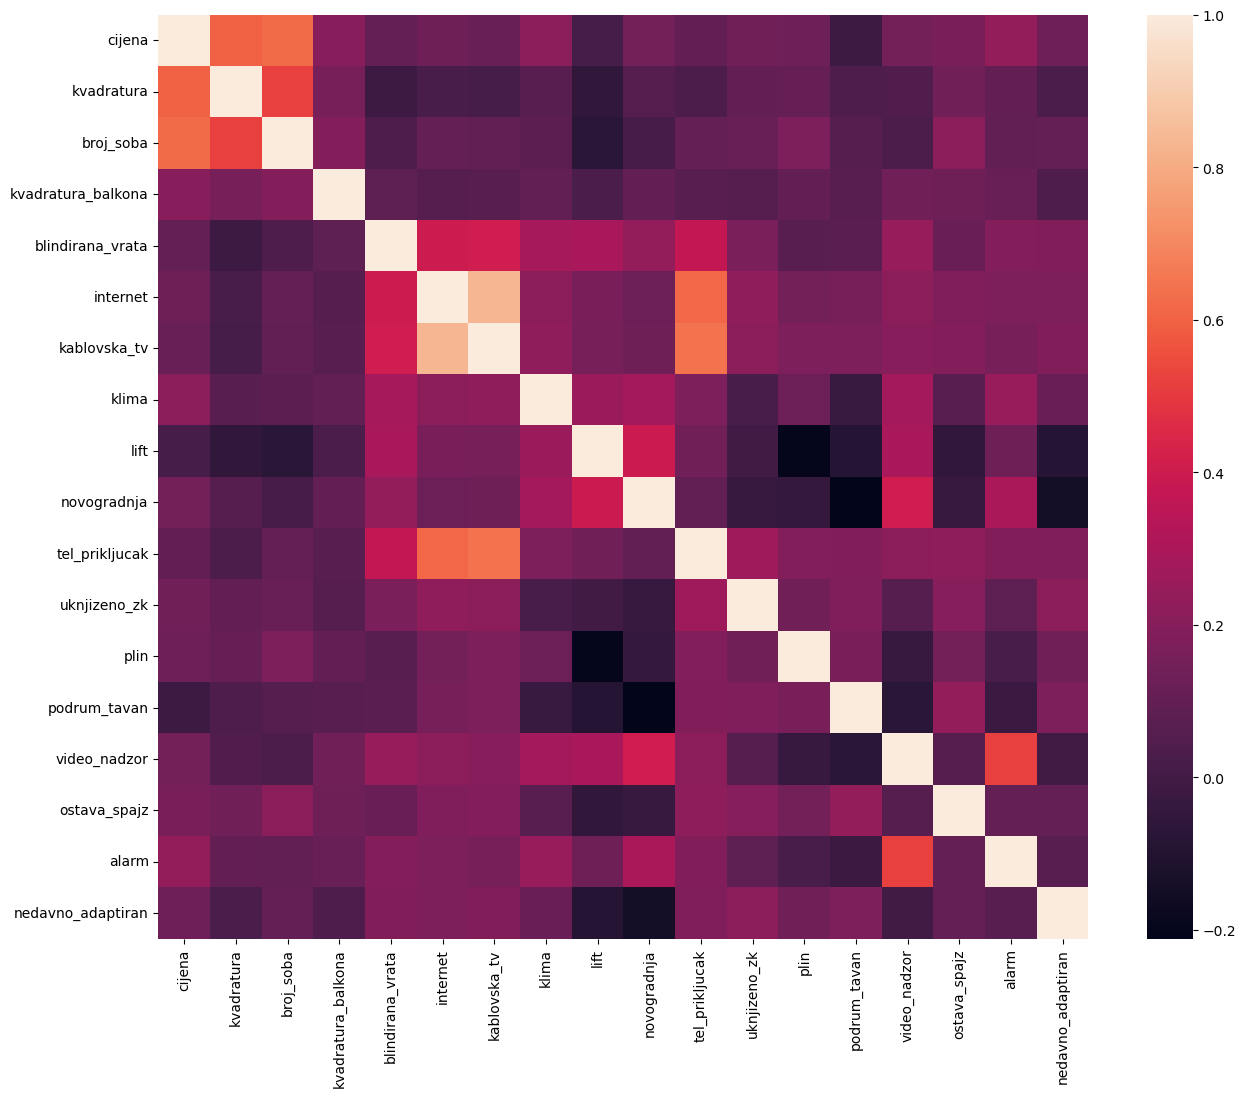

In [21]:
# Check for correlation between variables
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(numeric_only=True))

In [22]:
categorical_columns = ['broj_soba', 'sprat', 'namjesten', 'stanje',
                       'vrsta_grijanja', 'godina_izgradnje',
                       'vrsta_poda', 'blindirana_vrata', 'internet', 'kablovska_tv', 'klima',
                       'lift', 'novogradnja', 'tel_prikljucak', 'uknjizeno_zk', 'plin',
                       'podrum_tavan', 'video_nadzor', 'ostava_spajz', 'alarm',
                       'nedavno_adaptiran']

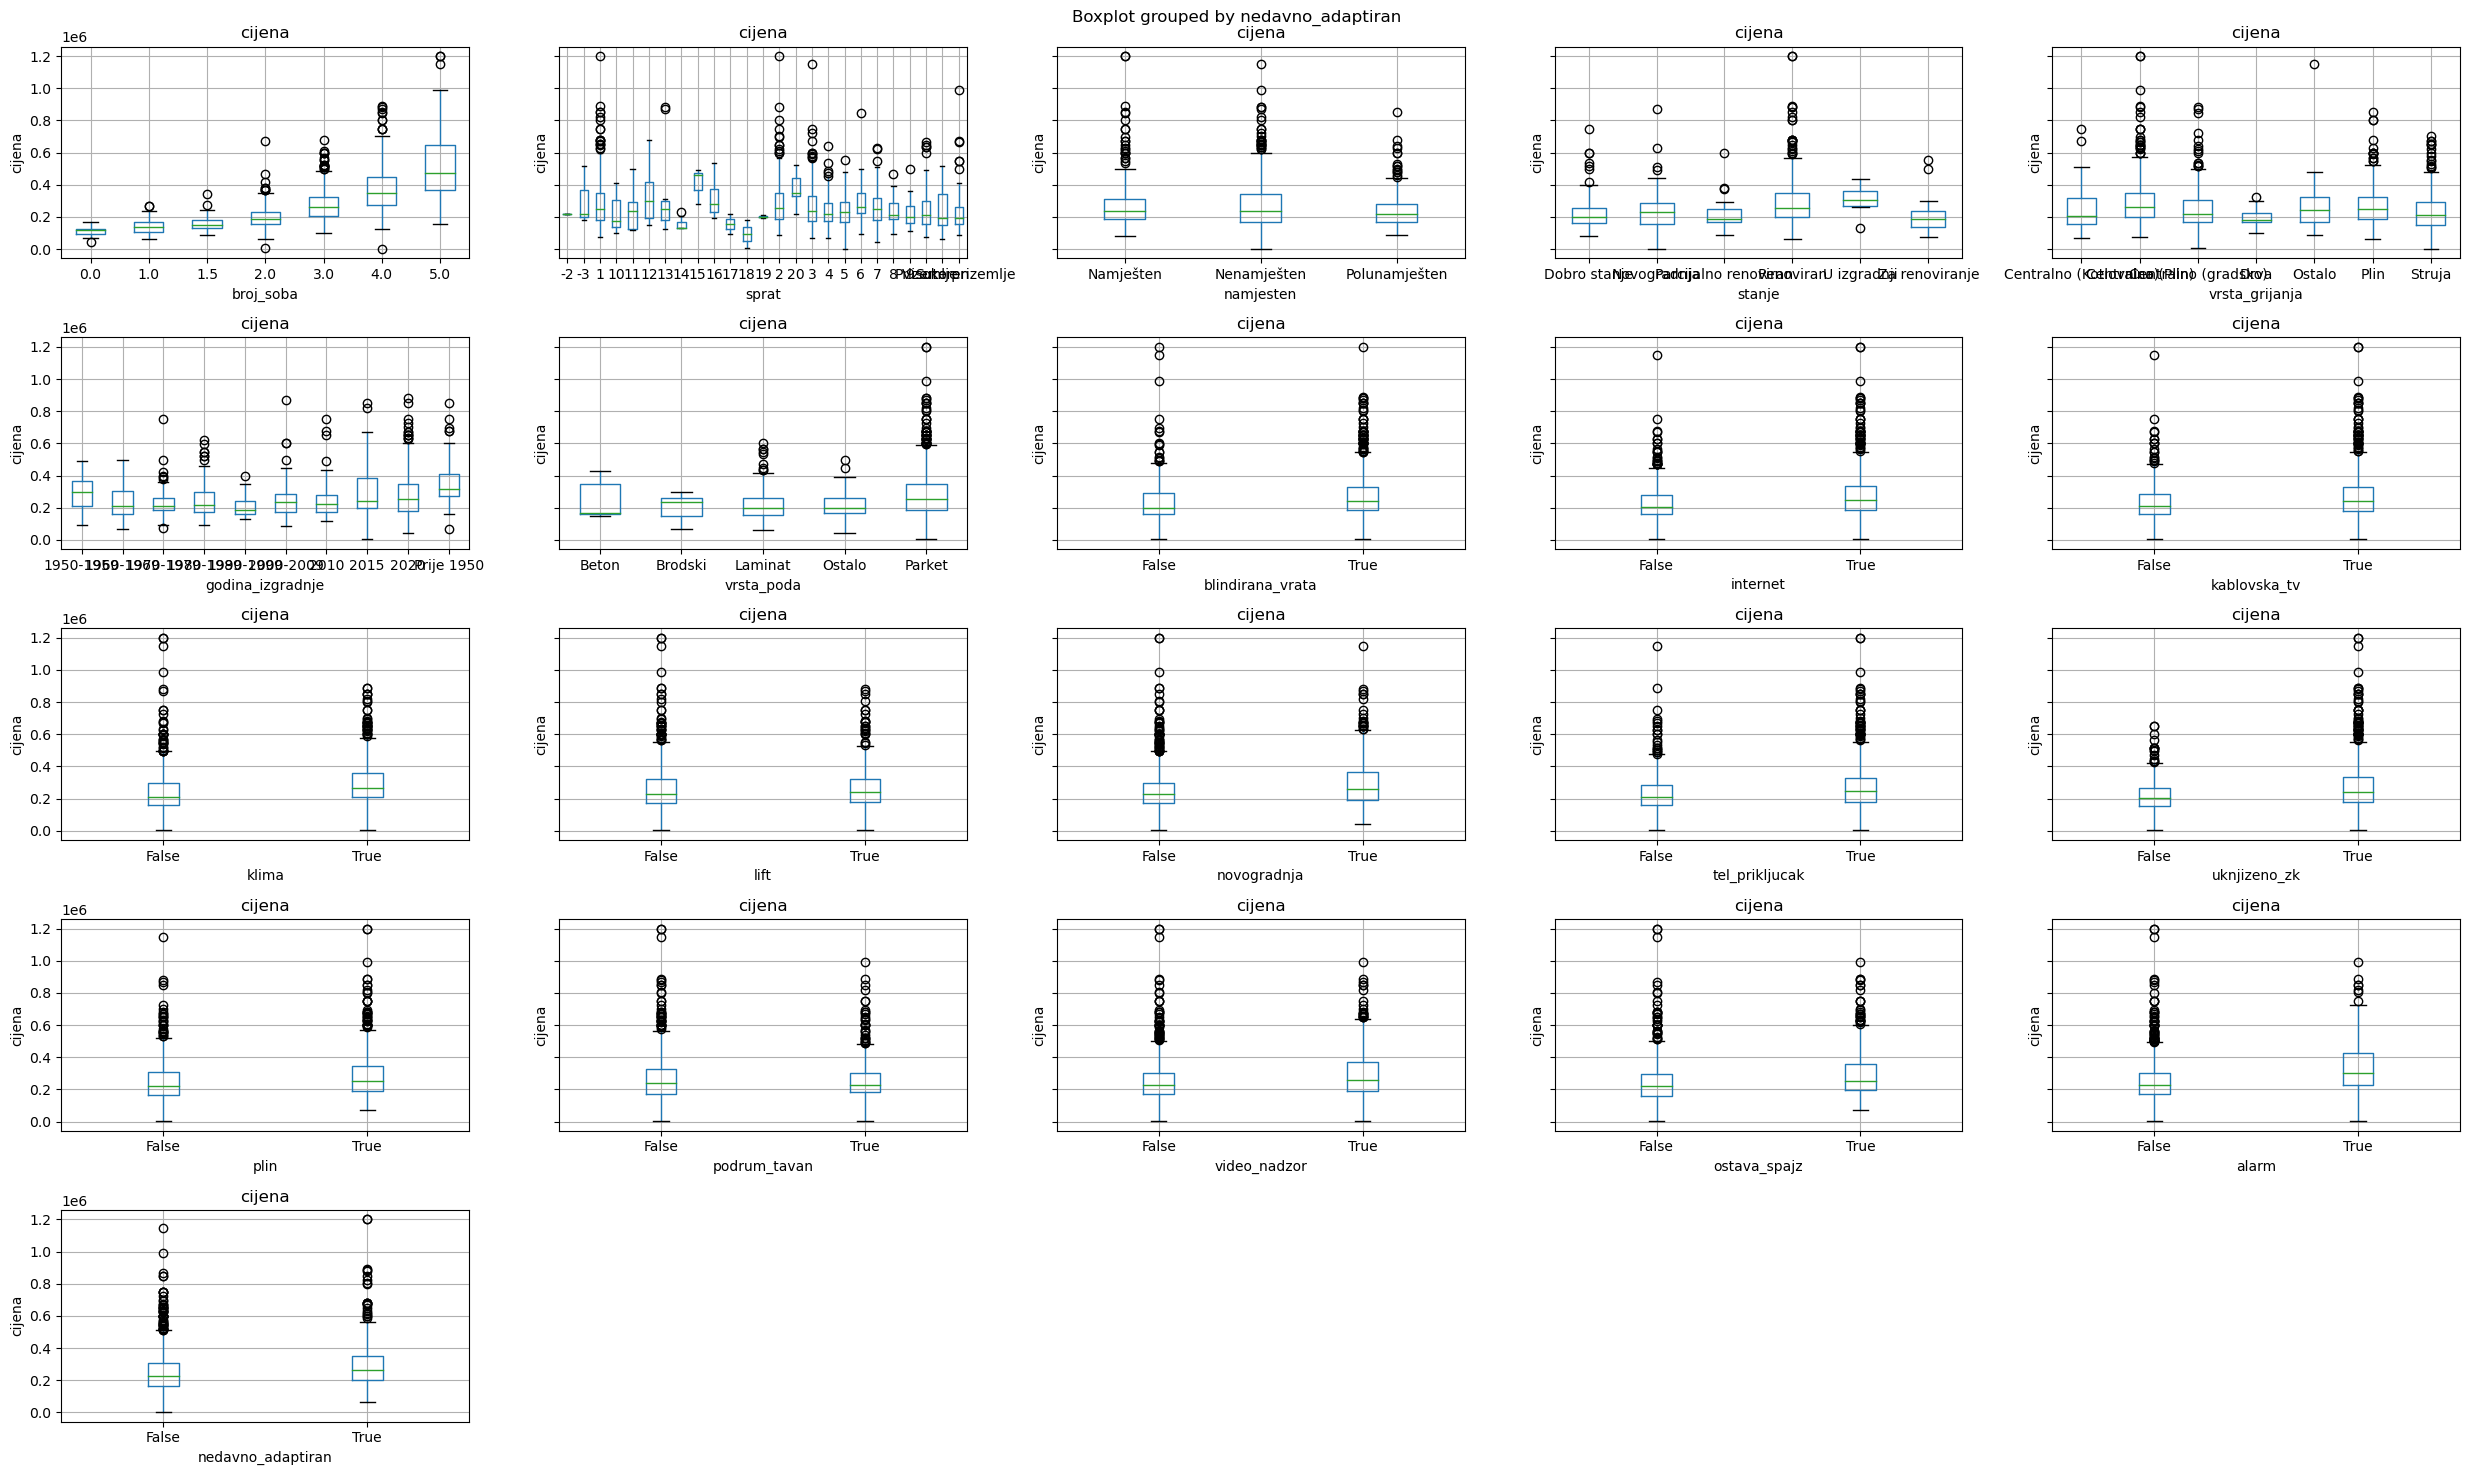

In [23]:
plot_boxplots_categorical(df, 'cijena', categorical_columns)

In [24]:
df.to_csv('svi_stanovi.csv', index=False)